In [4]:
from class_magnesium_not_drop_na import *
from sklearn.preprocessing import LabelEncoder

### С группами

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.230760576058
Average score:  0.77700520052
Last score:  0.776740174017


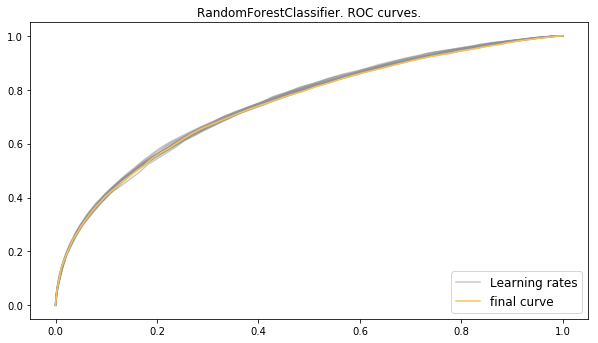

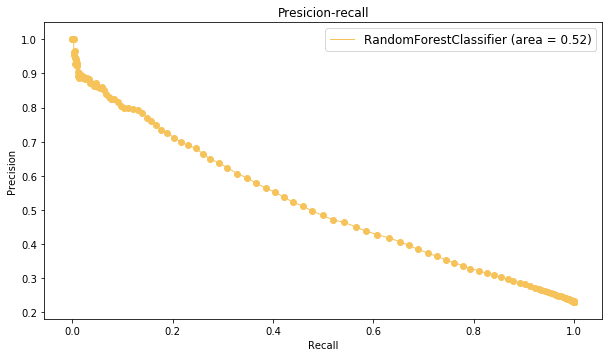

Confusion matrix, without normalization
[[20476    35]
 [ 5918   235]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.96  0.04]]


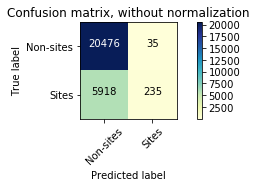

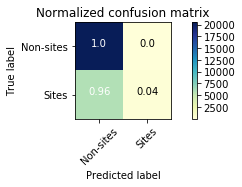

In [7]:
# Несбалансированная тренировка
m = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'])
data = m.compute(15, 0.3, reduce_features = False)

C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tikho\Anaconda3\lib\site-packages\imblearn\base.py:343: UserWarning: The target type should be binary or multiclass.
  warnings.warn('The target type should be binary or multiclass.')
C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"




Number of sites:  6153
Portion of sites:  0.5
Average score:  0.70996261986
Last score:  0.710710222656


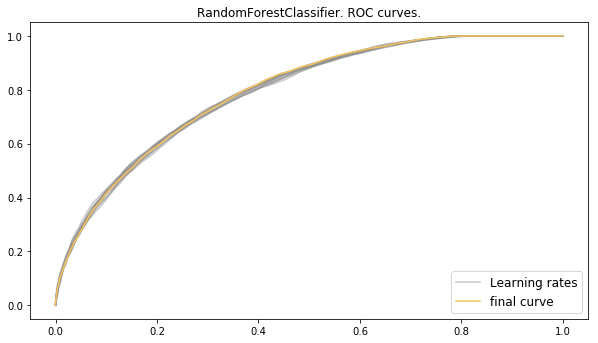

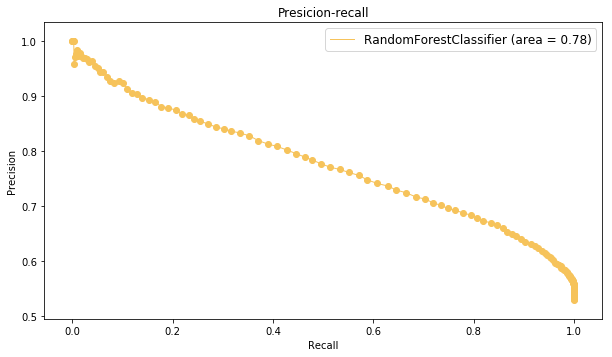

Confusion matrix, without normalization
[[4229 1924]
 [1636 4517]]
Normalized confusion matrix
[[ 0.69  0.31]
 [ 0.27  0.73]]


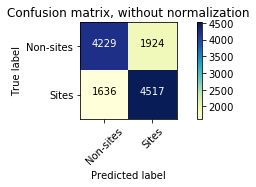

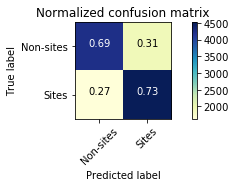

In [5]:
# Cбалансированная тренировка
m_rand = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'])
rus = RandomUnderSampler(random_state=42)

data = m_rand.data_numpy
lb_make = LabelEncoder()
data[:,0] = lb_make.fit_transform(data[:,0]).reshape(-1,1)
data, y = rus.fit_sample(m_rand.data_numpy[:,:-1], m_rand.data_numpy[:,-1])

y = np.ravel(np.asarray(y, dtype="int"))
#print(y)
#print(y.shape)
x = data[:,1:]
m_rand.groups = data[:,0]
print('Before: ', m_rand.x.shape)
print('After: ', x.shape)
data_rand = m_rand.fit_predict(15, 0.3, redundant = False, x = x, y = y)

### Без групп

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"




Number of sites:  6153
Portion of sites:  0.230760576058
Average score:  0.77696519652
Last score:  0.776590159016


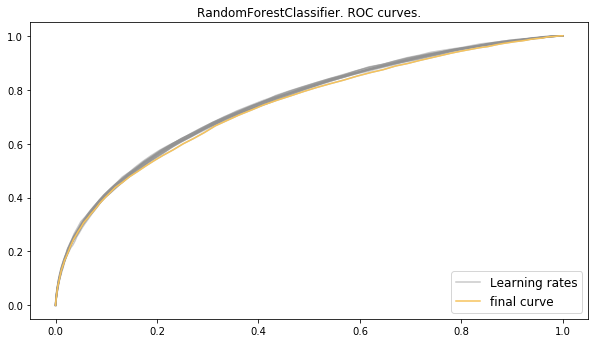

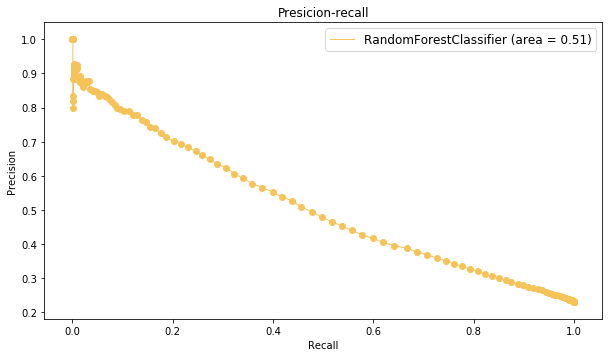

Confusion matrix, without normalization
[[20470    41]
 [ 5916   237]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.96  0.04]]


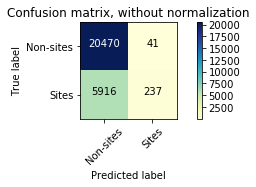

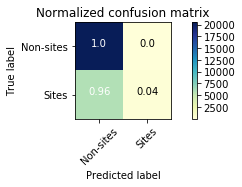

In [102]:
# Несбалансированная тренировка
m_out = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'], with_groups = False)
data_out = m_out.compute(15, 0.3, reduce_features = False)

(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.710076385503
Last score:  0.706322119291


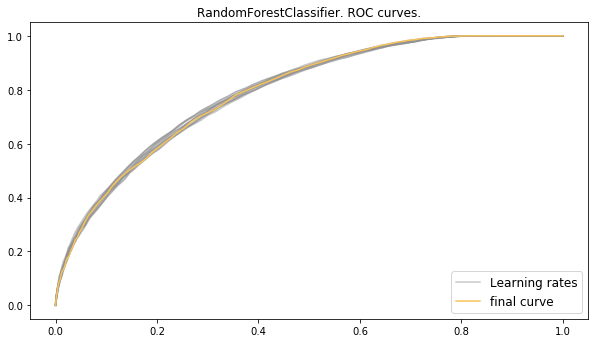

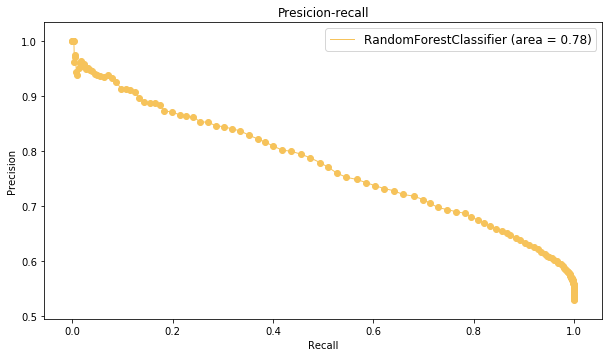

Confusion matrix, without normalization
[[4213 1940]
 [1674 4479]]
Normalized confusion matrix
[[ 0.68  0.32]
 [ 0.27  0.73]]


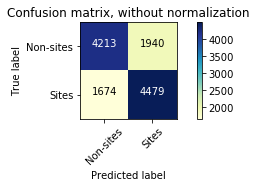

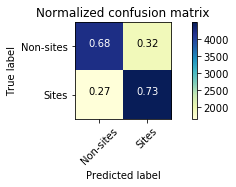

In [6]:
# Cбалансированная тренировка
m_rand_out = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'], 
                       with_groups = False)
data_rand_out = m_rand_out.compute(15, 0.3, reduce_features = False, balanced = True)

### Валидация

In [103]:
def plot_confusion_matrix_(cm, ax, title='Confusion matrix', cmap=plt.cm.YlGnBu):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        classes = ['Non-sites', 'Sites']
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.set_title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, round(cm[i, j],2),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [104]:
y_pred = m.trained_model.predict(m.x[m.indexes[-1]])
y_prob = m.trained_model.predict_proba(m.x[m.indexes[-1]])[:, 1]

y_pred_balanced= m_rand.trained_model.predict(m.x[m.indexes[-1]])
y_prob_balanced = m_rand.trained_model.predict_proba(m.x[m.indexes[-1]])[:, 1]

y_pred_out= m_out.trained_model.predict(m.x[m.indexes[-1]])
y_prob_out = m_out.trained_model.predict_proba(m.x[m.indexes[-1]])[:, 1]

y_pred_balanced_out= m_rand_out.trained_model.predict(m.x[m.indexes[-1]])
y_prob_balanced_out = m_rand_out.trained_model.predict_proba(m.x[m.indexes[-1]])[:, 1]

y = m.y[m.indexes[-1]]
print('Portion of sites:', np.sum(y==1)/y.shape[0])
print('Amount of sites:', np.sum(y==1))

Portion of sites: 0.230760576058
Amount of sites: 6153


In [105]:
cnfs = [confusion_matrix(y, y_pred), confusion_matrix(y, y_pred_balanced), 
        confusion_matrix(y, y_pred_out), confusion_matrix(y, y_pred_balanced_out)]
cnfs_normed = [cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] for cm in cnfs]

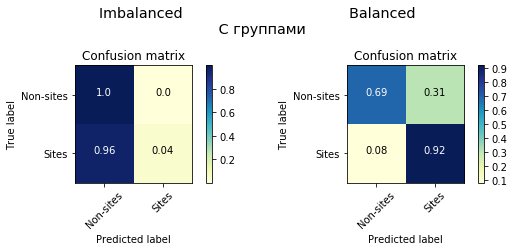

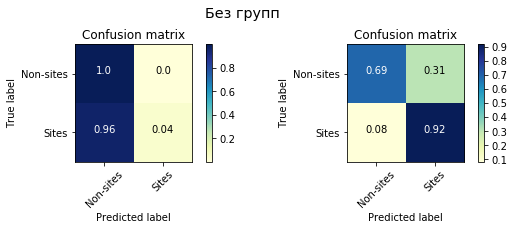

In [126]:
# normalized
fig = plt.figure(figsize = (8,3))
st = fig.suptitle("Imbalanced                                    Balanced \n C группами", fontsize="x-large")
st.set_y(1.15)
st.set_x(0.53)
ax = fig.add_subplot(121)
plot_confusion_matrix_(cnfs_normed[0], ax)
ax = fig.add_subplot(122)
plot_confusion_matrix_(cnfs_normed[1], ax)

fig = plt.figure(figsize = (8,3))
st = fig.suptitle("Без групп", fontsize="x-large")
st.set_y(1.05)
ax = fig.add_subplot(121)
plot_confusion_matrix_(cnfs_normed[2], ax)
ax = fig.add_subplot(122)
plot_confusion_matrix_(cnfs_normed[3], ax)
plt.show()

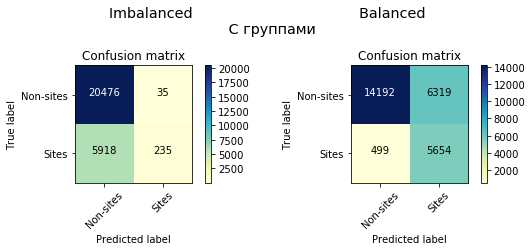

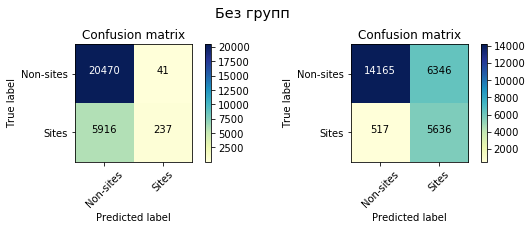

In [127]:
fig = plt.figure(figsize = (8,3))
st = fig.suptitle("Imbalanced                                    Balanced \n C группами", fontsize="x-large")
st.set_y(1.15)
st.set_x(0.53)
ax = fig.add_subplot(121)
plot_confusion_matrix_(cnfs[0], ax)
ax = fig.add_subplot(122)
plot_confusion_matrix_(cnfs[1], ax)

fig = plt.figure(figsize = (8,3))
st = fig.suptitle("Без групп", fontsize="x-large")
st.set_y(1.05)
ax = fig.add_subplot(121)
plot_confusion_matrix_(cnfs[2], ax)
ax = fig.add_subplot(122)
plot_confusion_matrix_(cnfs[3], ax)
plt.show()

### Создание файлов для медитаций

In [12]:
df = pd.DataFrame(m.data_numpy[m.indexes[-1]])
df.columns = m.data.columns
df['probabilities'] = y_prob
df['predicted'] = y_pred
df.to_csv('outputs/'+'imbalanced_with_groups_set_minresol_N_5_predicted.csv',index = False, sep = '\t')

In [13]:
df['probabilities'] = y_prob_balabnced
df['predicted'] = y_pred_balanced
df.to_csv('outputs/'+'balanced_with_groups_set_minresol_N_5_predicted.csv',index = False, sep = '\t')

In [16]:
df['probabilities'] = y_prob_balanced_out
df['predicted'] = y_pred_balanced_out
df.to_csv('outputs/'+'imbalanced_without_groups_set_minresol_N_5_predicted.csv',index = False, sep = '\t')

In [17]:
df['probabilities'] = y_prob_balanced_out
df['predicted'] = y_pred_balanced_out
df.to_csv('outputs/'+'balanced_without_groups_set_minresol_N_5_predicted.csv',index = False, sep = '\t')